# Importing Libraries

In [1]:
! pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

#### SKlearn ####
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from kneed import KneeLocator


# Part a

In [3]:
df_customer = pd.read_csv('/content/drive/MyDrive/Data Mining/HW4/Wholesale customers data.csv')
df_customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df_customer.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There is no null value

# Part b

In [5]:
z_score = zscore(df_customer[list(df_customer.columns)])
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_customer = df_customer[filtered_entries]
df_customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Part c

In [8]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_customer)
X.shape

(414, 8)

# Part d

In [9]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X.shape

(414, 2)

In [10]:
df_reduced = pd.DataFrame(X, columns=['pc1', 'pc2'])
df_reduced.head()

,pc1,pc2
0,0.678720,-0.178696
1,0.712045,-0.166655
2,0.737491,-0.167136
3,-0.356956,-0.259620
4,0.618327,-0.198902


# Part e

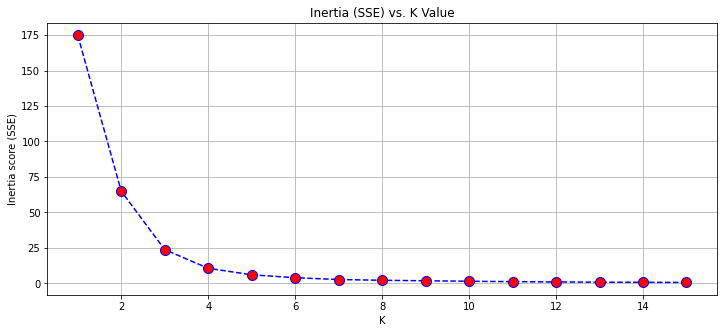

In [11]:
inertia_values = []
for k in range(1, 16):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(df_reduced)
  inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(12,5))
plt.plot(range(1, 16), inertia_values, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Inertia (SSE) vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')


# fig, ax = plt.subplots(figsize=(8, 6))
# plt.plot(range(1, 16), inertia_values, color='red')
# plt.xlabel('K', fontsize=15)
# plt.ylabel('SSE', fontsize=15)
# plt.title('SSE vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

Optimum K is 7

# Part f

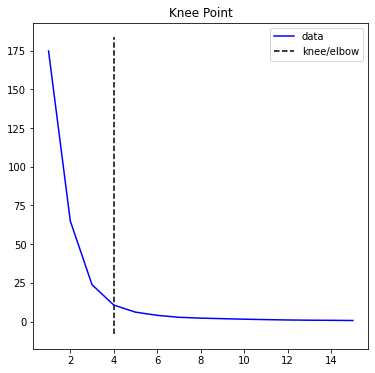

In [13]:
kneedle = KneeLocator(range(1, 16), inertia_values, S=1.0, curve="convex", direction="decreasing")
kneedle.plot_knee()

# Part g

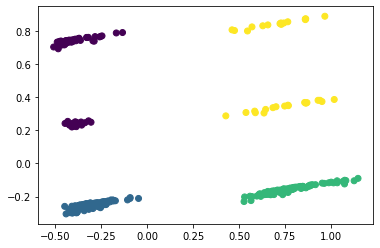

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Part h

In [17]:
df_reduced['labels'] = kmeans.labels_
df1 = df_reduced.groupby('labels').describe().T
df1

labels             0           1          2          3
pc1 count  83.000000  201.000000  97.000000  33.000000
    mean   -0.399504   -0.327134   0.771287   0.730236
    std     0.069608    0.063967   0.138220   0.156289
    min    -0.508485   -0.448453   0.527158   0.428090
    25%    -0.446993   -0.367193   0.672705   0.629182
    50%    -0.409372   -0.342961   0.742363   0.729482
    75%    -0.378911   -0.299626   0.840734   0.860878
    max    -0.133943   -0.046796   1.147341   1.017859
pc2 count  83.000000  201.000000  97.000000  33.000000
    mean    0.577831   -0.256017  -0.158487   0.571897
    std     0.236530    0.016350   0.027458   0.254025
    min     0.220682   -0.305004  -0.230151   0.287960
    25%     0.247857   -0.264949  -0.176947   0.347317
    50%     0.731972   -0.255558  -0.160252   0.382102
    75%     0.741903   -0.247273  -0.142837   0.841151
    max     0.791866   -0.206324  -0.090007   0.890406